In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [60]:
import pandasql as pdsql
import pandas as pd
tablePokemon = pd.read_csv('...')

In [5]:
import seaborn as sb

In [7]:
tablePokemon

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [11]:
first_quest = '''
SELECT
(SUM(CASE WHEN "Type 2" IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS percentage
FROM tablePokemon
'''

In [12]:
result1 = pdsql.sqldf(first_quest, locals())

In [47]:
result1

,percentage
0,51.75


In [8]:
second_quest = '''
SELECT DISTINCT "Type 1" AS type FROM tablePokemon
UNION
SELECT DISTINCT "Type 2" AS type FROM tablePokemon
WHERE "Type 2" IS NOT NULL
'''

In [9]:
result2 = pdsql.sqldf(second_quest, locals())

In [10]:
print(result2)

        type
0        Bug
1       Dark
2     Dragon
3   Electric
4      Fairy
5   Fighting
6       Fire
7     Flying
8      Ghost
9      Grass
10    Ground
11       Ice
12    Normal
13    Poison
14   Psychic
15      Rock
16     Steel
17     Water


In [14]:
third_quest = '''
SELECT CASE
WHEN "Type 2" IS NOT NULL THEN 'double'
ELSE 'single'
END AS pokemonType,
AVG(Total)
FROM tablePokemon
GROUP BY pokemonType
'''

In [15]:
result3 = pdsql.sqldf(third_quest, locals())

In [16]:
print(result3)

  pokemonType  AVG(Total)
0      double  456.628019
1      single  412.015544


In [17]:
fourth_quest = '''
SELECT CASE 
WHEN "Type 1" = 'Grass' OR "Type 2" = 'Grass' THEN 'grass'
ELSE CASE WHEN "Type 1" = 'Fairy' OR "Type 2" = 'Fairy' THEN 'fairy'
END
END AS pokType,
AVG(Defense)
FROM tablePokemon
GROUP BY pokType
'''

In [18]:
result4 = pdsql.sqldf(fourth_quest, locals())

In [19]:
print(result4)

  pokType  AVG(Defense)
0    None     74.128936
1   fairy     70.289474
2   grass     73.252632


In [20]:
five_quest = """
SELECT CASE
WHEN Legendary = 1 THEN 'legendary'
ELSE 'none'
END AS legType,
AVG(Total) avg_total, AVG(HP) avg_hp, AVG(Attack) avg_atk, AVG(Defense) avg_def, AVG(\"Sp. Atk\") sp_atk, AVG(\"Sp. Def\") sp_def, AVG(Speed) avg_speed
FROM tablePokemon
GROUP BY legType
"""

In [21]:
result5 = pdsql.sqldf(five_quest, locals())

In [22]:
print(result5) # Average legendary is stronger then non legendary

     legType   avg_total     avg_hp     avg_atk    avg_def      sp_atk  \
0  legendary  637.384615  92.738462  116.676923  99.661538  122.184615   
1       none  417.213605  67.182313   75.669388  71.559184   68.454422   

       sp_def   avg_speed  
0  105.938462  100.184615  
1   68.892517   65.455782  


In [23]:
six_quest = '''
SELECT 
    legendary.Name AS legName, 
    none.Name AS nonlegName,
    legendary.Total AS legTotal, 
    none.Total AS nonlegTotal
FROM tablePokemon AS legendary
JOIN tablePokemon AS none
ON legendary.Legendary = 1 AND none.Legendary = 0
WHERE legendary.Total < none.Total
'''

In [24]:
result6 = pdsql.sqldf(six_quest, locals())

In [25]:
print(result6)

        legName                 nonlegName  legTotal  nonlegTotal
0      Articuno    AbomasnowMega Abomasnow       580          594
1      Articuno  AerodactylMega Aerodactyl       580          615
2      Articuno          AggronMega Aggron       580          630
3      Articuno      AlakazamMega Alakazam       580          590
4      Articuno        AltariaMega Altaria       580          590
...         ...                        ...       ...          ...
1260  Volcanion                    Slaking       600          670
1261  Volcanion        SteelixMega Steelix       600          610
1262  Volcanion      SwampertMega Swampert       600          635
1263  Volcanion    TyranitarMega Tyranitar       600          700
1264  Volcanion      VenusaurMega Venusaur       600          625

[1265 rows x 4 columns]


In [39]:
seven_quest = '''
SELECT 
    legendary.Name AS legName, 
    none.Name AS nonlegName,
    none.Total - legendary.Total AS TotalDifference
FROM tablePokemon AS legendary
JOIN tablePokemon AS none
ON legendary.Legendary = 1 AND none.Legendary = 0
WHERE legendary.Total < none.Total
'''

In [40]:
result7 = pdsql.sqldf(seven_quest, locals())

In [41]:
print(result7)

        legName                 nonlegName  TotalDifference
0      Articuno    AbomasnowMega Abomasnow               14
1      Articuno  AerodactylMega Aerodactyl               35
2      Articuno          AggronMega Aggron               50
3      Articuno      AlakazamMega Alakazam               10
4      Articuno        AltariaMega Altaria               10
...         ...                        ...              ...
1260  Volcanion                    Slaking               70
1261  Volcanion        SteelixMega Steelix               10
1262  Volcanion      SwampertMega Swampert               35
1263  Volcanion    TyranitarMega Tyranitar              100
1264  Volcanion      VenusaurMega Venusaur               25

[1265 rows x 3 columns]


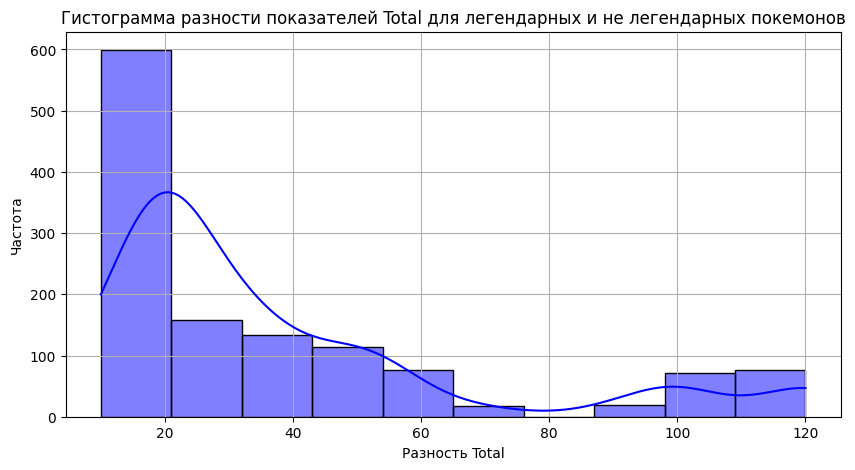

In [42]:
plt.figure(figsize=(10, 5))
sb.histplot(result7['TotalDifference'], bins=10, kde=True, color ='blue')
plt.title('Гистограмма разности показателей Total для легендарных и не легендарных покемонов')
plt.xlabel('Разность Total')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [43]:
mean = result7['TotalDifference'].mean()
median = result7['TotalDifference'].median()
mode = result7['TotalDifference'].mode()

In [44]:
print(f'среднее арифметическое: {mean}')
print(f'медиана: {median}')
print(f'мода: {mode.values[0]}')

среднее арифметическое: 38.74624505928854
медиана: 25.0
мода: 20


In [26]:
eight_quest = '''
SELECT HP, Attack, Defense, "Sp. Atk", "Sp. Def", Speed
FROM tablePokemon
'''

In [27]:
result8 = pdsql.sqldf(eight_quest, locals())

In [62]:
corr_matrix = result8.corr()
corr_df = pd.DataFrame(corr_matrix)
corr_long = corr_df.stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']
min_corr = corr_long.loc[corr_long['Correlation'].idxmin()]

In [61]:
min_corr

Feature1        Defense
Feature2          Speed
Correlation    0.015227
Name: 17, dtype: object

In [33]:
nine_quest_1 = '''
SELECT Generation, COUNT(*) AS total
FROM tablePokemon
GROUP BY Generation
'''

In [34]:
nine_quest_2 = '''
SELECT Generation, COUNT(*) AS legendary
FROM tablePokemon
WHERE Legendary = 1
GROUP BY Generation
'''

In [35]:
result9_1 = pdsql.sqldf(nine_quest_1)
result9_2 = pdsql.sqldf(nine_quest_2)

In [46]:
combo = pd.merge(result9_1, result9_2, on='Generation', how='left').fillna(0)
combo['Percentage legendary'] = (combo['legendary'] / combo['total']) * 100

In [63]:
combo

,Generation,total,legendary,Percentage legendary
0,1,166,6,3.614458
1,2,106,5,4.716981
2,3,160,18,11.250000
3,4,121,13,10.743802
4,5,165,15,9.090909
5,6,82,8,9.756098


In [38]:

# Смотря на 'result5', можно увидеть, что средний легендарный намного сильнее среднего не легендарного. Смотря на поколение, можно увидеть,
# что в первых поколениях было мало легендарных, однако начиная с 3 поколения видно, что легендарных стало намного больше.
# Можно сделать вывод, что легендарные покемоны намного сильнее не легендарных, и их количество начиная с 3 поколения значительно возрасло, в целом,
# никакая характеристика не играет особой роли.
